In [1]:
from random import random
from math import ceil
from collections import Counter, OrderedDict
import matplotlib.pyplot as plt
import pandas as pd

# Random Variables & Probability Distributions

Say $X$ is our random variable. What does $P(X)$ mean then?

We're actually more interested in $P(X = value)$ : the `probability that our random variable is a certain value`.

The value of $X$ is not to be calculated. We already know the values or the range of values $X$ can be. We want to know the probability that $X$ is a certain value or another. 

## Expectation &  Variance

`expectation` : mean of the random variable/weighted sum of the outcomes

$ E(X) = \mu = \sum_x {xP(X=x)} $

`variance` : measure of how much the datapoints are dispersed from the mean in terms of `standard deviation`s

$Var(X) = \sum_x{[P(X=x)(x-\mu)^2]}$

$\sigma = \sqrt{Var(X)}$

Before we delve further into the expectation and variances of random variables, let's learn about some common probability distributions.

## Probability Distributions

### Bernoulli

a `single trial` with 2 outcomes (success/failure) and 1 parameter
 
$P(X = 1) = p$

$P(X = 0) = 1 - p$

### Binomial

based on a `series of independent Bernoulli trials` and counts the number of successes ($k$) in $n$ trials

The probability of success $p$ and the number of independent trials $n$ must be constant.

$P(X = k) = (n,k) = p^k(1-p)^{n-k}$


$E(X_{binomial}) = np$

$Var(X_{binomial}) = np(1-p)$

In [2]:
def binomial(p,n,k) :
    return (p**k)*((1-p)**(n-k))

_example : picking cookies out of a bag_

In [3]:
n = 25 # < {*}
k = 10 # < {*}
p1 = 0.25 # < {*}
p2 = 0.3 # < {*}
p3 = 0.45 # < {*}
cookie_types = ['♡','☆','☐']

print(f"Let's say that a bakery produces 3 kinds of cookies.\nThe ♡-shaped cookies have a {p1*100}% chance of being produced;\nthe ☆-shaped, {p2*100}%;\nand the ☐-shaped, {p3*100}%.\n\nIn a bag of {n} cookies, what is the probability that exactly {k} cookies would be ♡-shaped?")

print(f"\t-- {binomial(0.3,n,k)*100}%")


Let's say that a bakery produces 3 kinds of cookies.
The ♡-shaped cookies have a 25.0% chance of being produced;
the ☆-shaped, 30.0%;
and the ☐-shaped, 45.0%.

In a bag of 25 cookies, what is the probability that exactly 10 cookies would be ♡-shaped?
	-- 2.8033875960062384e-06%


The probability of being an exact value is extremely small in most cases so exact values are not of much interest. Rather, it's better to calculate the probability of being within a range.

In [4]:
f = 5 # < {*}
print(f"Instead, let's ask what is the probability that ♡-shaped cookies make up more than 1/{f} of the cookies.")
print(f"This would be equal to the probability that ♡-shaped cookies make up less than or equal to 1/{f} of the cookies subtracted from 1.")

for i in range(ceil(n/f)) :
    print(f"\t{i} cookies : {binomial(p1,n,i)*100}%")
    print(f"\t\t\t+")
print(f"\t{f} cookies : {binomial(p1,n,f)*100}%\n\t\t\t=")
leq_third = sum([binomial(p1,n,i)*100 for i in range(ceil(n/f)+1)])
predicted = round((1-leq_third)*100,3)
print(f"\t\t{leq_third}\n")
print(f"\t1 - {leq_third} = {1-leq_third}")
print(f"\t{predicted}%")


Instead, let's ask what is the probability that ♡-shaped cookies make up more than 1/5 of the cookies.
This would be equal to the probability that ♡-shaped cookies make up less than or equal to 1/5 of the cookies subtracted from 1.
	0 cookies : 0.07525434581650003%
			+
	1 cookies : 0.025084781938833345%
			+
	2 cookies : 0.008361593979611115%
			+
	3 cookies : 0.002787197993203705%
			+
	4 cookies : 0.0009290659977345683%
			+
	5 cookies : 0.0003096886659115228%
			=
		0.11272667439179429

	1 - 0.11272667439179429 = 0.8872733256082057
	88.727%


And how about we try to observe this for ourselves with brute force? We generate 100 bags of cookies, using the probabilities detailed above, and we keep track of the proportion of ♡-shaped cookies of each bag.

In [6]:
nb_cookies = []
proportions = []
t = 5000 # < {*}
for i in range(t) :
    bag = []
    for j in range(n) :
        x = random()
        if x < p1 : bag.append('♡')
        if x >= p1 and x < p2 : bag.append('☆')
        else : bag.append('☐')
    if '♡' not in bag : 
        nb_cookies.append(0)
        proportions.append(0)
    else : 
        nb_cookies.append(dict(Counter(bag))['♡'])
        proportions.append(dict(Counter(bag))['♡']/n)

for x in proportions :
    print(x,end=" ")


0.2 0.28 0.16 0.2 0.16 0.28 0.28 0.24 0.24 0.32 0.2 0.2 0.08 0.2 0.16 0.24 0.24 0.24 0.24 0.16 0.12 0.2 0.24 0.16 0.36 0.32 0.12 0.16 0.2 0.36 0.2 0.2 0.32 0.2 0.28 0.12 0.36 0.2 0.2 0.16 0.2 0.2 0.16 0.28 0.28 0.44 0.32 0.16 0.24 0.24 0.2 0.24 0.12 0.4 0.32 0.16 0.16 0.2 0.32 0.24 0.16 0.24 0.32 0.28 0.36 0.2 0.32 0.08 0.2 0.16 0.16 0.36 0.16 0.32 0.16 0.16 0.16 0.32 0.36 0.24 0.16 0.2 0.2 0.56 0.24 0.16 0.2 0.16 0.4 0.28 0.24 0.36 0.32 0.24 0.4 0.16 0.28 0.28 0.24 0.12 0.16 0.28 0.32 0.28 0.32 0.24 0.2 0.12 0.36 0.2 0.28 0.24 0.12 0.24 0.16 0.32 0.32 0.16 0.28 0.12 0.16 0.28 0.32 0.28 0.16 0.32 0.32 0.32 0.16 0.24 0.24 0.16 0.24 0.28 0.4 0.4 0.32 0.28 0.12 0.28 0.36 0.4 0.28 0.12 0.16 0.28 0.24 0.32 0.32 0.4 0.36 0.28 0.4 0.28 0.28 0.24 0.32 0.2 0.24 0.36 0.08 0.24 0.28 0.24 0.28 0.2 0.48 0.16 0.08 0.2 0.4 0.24 0.24 0.16 0.36 0.08 0.24 0.16 0.4 0.36 0.16 0.28 0.32 0.32 0.08 0.36 0.32 0.16 0.28 0.28 0.2 0.2 0.2 0.12 0.28 0.28 0.28 0.28 0.12 0.48 0.24 0.32 0.16 0.2 0.24 0.48 0.24 0.2 0

In [7]:
nb_dict = dict(sorted(Counter(nb_cookies).items(), key=lambda item : item[0]))

In [11]:
propor_dict = dict(sorted(Counter(proportions).items(),  key=lambda item : item[0]))

<Axes: xlabel='Proportions'>

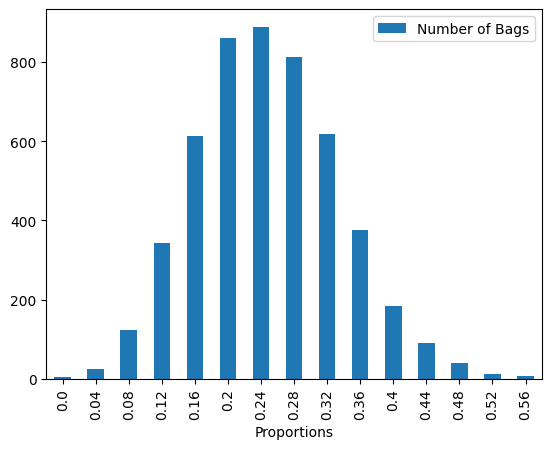

In [12]:
df = pd.DataFrame({"Proportions" : propor_dict.keys(),"Number of Bags" : propor_dict.values()})
df.plot(x = "Proportions", y = "Number of Bags", kind="bar")

In [ ]:
print(f"Let's see how often ♡-shaped cookies make more than 1/{f} of the bag")
cpt = 0 
for x in proportions :
    if x > (1/f) : cpt += 1
print(f"♡-shaped cookies made up more than 1/{f} the cookies of {cpt} bags out of {t} bags")
print(f"\t-- {(cpt/t)*100}%")

if (cpt/t)*100 < predicted : print(f"This is less than ")

Let's see how often ♡-shaped cookies make more than 1/5 of the bag
♡-shaped cookies made up more than 1/5 the cookies of 3144 bags out of 5000 bags
	-- 62.88%
This is less than 


Expectation : $np$

In [ ]:
print(f"n = {n} and p = {p1}")
print(f"{n} * {p1} = {n*p1}, which is {((n*p1)/n)*100}% of {n}\n")

print(f"Let's see what the average proportion of ♡-shaped cookies is.")
print(f"\t -- {(sum(proportions)/t)*100}%")

n = 25 and p = 0.25
25 * 0.25 = 6.25, which is 25.0% of 25

Let's see what the average proportion of ♡-shaped cookies is.
	 -- 25.096%


Variance : $np(1-p)$

In [37]:
var = n*p1*(1-p1)
print(f"{n} * {p1} * {1-p1} = {var}")

m = sum(nb_dict.keys())/t
print(f"The average is {m}")

distances = [abs(x-m) for x in nb_dict.keys()]
distances

25 * 0.25 * 0.75 = 4.6875
The average is 0.021


[0.021,
 0.979,
 1.979,
 2.979,
 3.979,
 4.979,
 5.979,
 6.979,
 7.979,
 8.979,
 9.979,
 10.979,
 11.979,
 12.979,
 13.979]

<Axes: xlabel='Number of Cookies'>

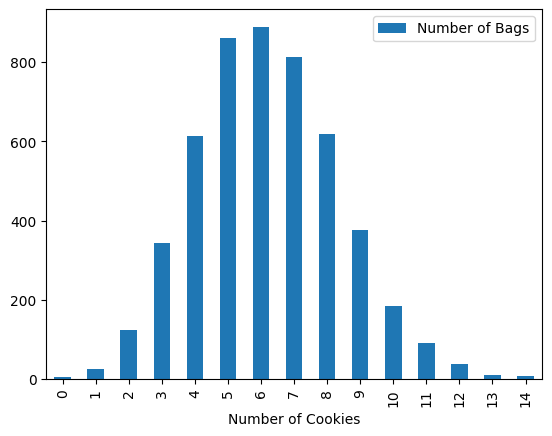

In [13]:
df = pd.DataFrame({"Number of Cookies" : nb_dict.keys(),"Number of Bags" : nb_dict.values()})
df.plot(x = "Number of Cookies", y = "Number of Bags", kind="bar")